In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_inicial = pd.read_excel(r"C:\Users\luis.montoya\Downloads\MU+1Pedido.xlsx") 

In [5]:
from datetime import date

dia=[]
mes=[]
salida_fecha= df_inicial["saliopunto"]
aux=0

for fecha in salida_fecha: 
    dia_var = fecha.day
    dia.append(dia_var)
    mes_var = fecha.month
    mes.append(mes_var)
    aux= aux + 1
    
df_inicial["Mes"] = mes
df_inicial["Dia"] = dia

df_inicial = df_inicial[(df_inicial["Mes"] == 4)|(df_inicial["Mes"] == 5)]
nombres_motorizados = pd.DataFrame(df_inicial["resourcename"])
nombres_motorizados = nombres_motorizados.drop_duplicates()

df_resumen = df_inicial.groupby(["resourcename"]).count()
df_resumen=df_resumen[df_resumen["uuid"]==1]
df_resumen = df_resumen.rename_axis('resourcename2').reset_index()
nombres_eliminar = df_resumen["resourcename2"]
for aliado in nombres_eliminar:
    indices = nombres_motorizados[nombres_motorizados["resourcename"]==aliado].index
    nombres_motorizados = nombres_motorizados.drop(indices)
    
nombres_motorizados["Cantidad_ordenes"] = 1000    
nombres = nombres_motorizados["resourcename"]

consolidado_total = pd.DataFrame(columns=["Nombre Motorizado","uiid pedido"])
for registros2 in nombres:
    
    pedidos_juntos = []
    df_tiempos_motorizado = df_inicial[df_inicial["resourcename"]==registros2]
    cantidad_registros=len(df_tiempos_motorizado)
    matriz_booleana = np.zeros((cantidad_registros,cantidad_registros),dtype=int)
    for i in range(cantidad_registros):
        for j in range(cantidad_registros):
            diferencia = df_tiempos_motorizado.iloc[i,2] - df_tiempos_motorizado.iloc[j,2]
            diferencia = (diferencia.total_seconds())/60
            if (diferencia<=20 and diferencia>0) or (diferencia>=-20 and diferencia<0):
                matriz_booleana[i,j] = 1
            else: matriz_booleana[i,j]=0
            if (i<j) and (matriz_booleana[i,j]==1):
                pedidos_juntos.append(i)
                pedidos_juntos.append(j)
    
    pedidos_juntos = list(set(pedidos_juntos))
    
    indice = []
    for k in range(0,len(df_tiempos_motorizado)):
        indice.append(k)
    df_tiempos_motorizado.index = indice
    
    pedidos_uiid = []
    nombre_motorizado =[]
    for element in pedidos_juntos:
        pedidos_uiid.append(df_tiempos_motorizado.iloc[element,0])
        nombre_motorizado.append(registros2)
    
    consolidado_df = pd.concat([pd.Series(nombre_motorizado),pd.Series(pedidos_uiid)],axis=1)
    consolidado_df.columns = ["Nombre Motorizado","uiid pedido"]
    
    consolidado_total= pd.concat([consolidado_total,consolidado_df],axis=0)
    
    
    
    
    vector_unos = []
    
    for i in range(cantidad_registros-1):
        for j in range(cantidad_registros-1):
            if j == i:
                valor_copia = matriz_booleana[i,i+1]
                vector_unos.append(valor_copia)
                
    vector_unos_copia = [vector_unos[0]]
    for i in range(1,len(vector_unos)):
        if vector_unos[i]==1:
            vector_unos_copia.append(1)
        elif vector_unos[i]==0:
            if vector_unos[i-1]==1:
                vector_unos_copia.append(1)
            elif vector_unos[i-1]==0:
                vector_unos_copia.append(0)
                
    valores, cantidad = np.unique(vector_unos_copia,return_counts=True)
    resultado = np.column_stack((valores,cantidad))
    
    for j in range(len(resultado)):
        if resultado[j,0]==1:
            cantidad_ordenes = resultado[j,1]
        else: cantidad_ordenes = 0
    print(registros2 + " " + str(cantidad_ordenes))


consolidado_total = consolidado_total.merge(df_inicial,left_on = "uiid pedido", right_on = "uuid",how = "inner")
consolidado_total.drop(["uuid","resourcename"],axis=1)

consolidado_total.to_excel(r"C:\Users\luis.montoya\Desktop\Motorizados+1pedido.xlsx",index=False)

Fonseca Chaves Rafael Humberto  1
Gil Asprilla  Yordin Alexander  0
Grau Nicolás 0
Ramirez Tamayo Camilo Andrés 0
Matheus Garcia Deivys Gregorio 9
Fontalvo Burgos Cristian Alberto 3
Rojas Cerro Over 0
Seijas Blanco Adolfo Augusto 0
espitia forigua Cristian david 2


<ipython-input-5-68ecd87a8d0e>:64: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  consolidado_df = pd.concat([pd.Series(nombre_motorizado),pd.Series(pedidos_uiid)],axis=1)


mora yarce david fernando 23
Bracamonte caballero Daniel antonio 50
Esquivel Horta Francisco Javier 28
Rodríguez Castro Luis Carlos 27
Tangarife Aullon Diego Fernando  39
Bustamante perez julio cesar 2
Uribe Salazar Jhonnatan Javier 21
Carlosama Berrio Jefferson 45
Mejia Robles  Jhonny Alexander 2
Bernal Cárdenas Javier Antonio 4
Ocampo Parra Juan Diego 0
Sierra Silva Ricardo 16
Orozco Epiayu Miguel Angel 7
Hernández Rojas Freddy Alexander 13
Vilchez Paz Gerardo 0
Sierra Velandia Jairo 12
Barreto Guevara Rebeca Andrea 0
Forero Ricardo 21
Londoño Rivera Daniel 42
Rosero Carlos Alirio 0
Ortiz Moreno Fabian Humberto 1
Orbegozo Sanchez Oscar Fabian 0
Herrera Alonso Jhon Alexander 19
Gomez Ramirez Jairo Nicolas 26
Ojeda Caro José Parmenio 20
Cruz Florez Jose John 5
Silva Jansasoy Luis Alberto 7
Raciny Mejia Juan Carlos 4
López Ramírez Wilmar Fernando 16
Paez Perez Maicol Alejandro 46
Reyes Galeano Brian Andres 38
Teuta Guzmán Ivan Mauricio 0
Lema Hoyos Luis Alberto 0
Avila Guzman Wilson Orl

Rodriguez Tovar Wilfredo 25
Guerrero Nancy 6
Hoyos Valencia Briam Steve 5
BALDOVINO ORTEGA KATTY LUZ 5
Ballesteros Coneo Robert Antonio 0
Rodríguez Delgado Angie Paola 8
Arenas Quiroga Jonathan David 0
Gonzalez Muñoz Daniel 3
González forero Oswaldo José 8
Torres Velasquez Yarol Stiven 9
Solano Giovanny 11
Benavides Perafan Bonyek 0
Picón Aparicio Jose Luis 0
Rodriguez Castañeda John Fredy 3
Córdoba Valencia Nataly 3
Diaz Diaz Arturo 12
Ardila Hernández Carlos Gustavo 0
Gacharna Benavides Johan Sebastián  0
Soto Toro Jahin Danilo 2
Quintero Melo Eduardo Jose 0
Vargas Canizales Jose Luis 0
Sandoval González María Camila 7
Vera Morales Jose Oscar 11
Angarita Garces Michael Steven 0
Quintero Peña Brayan Adonis 0
Escobar Arevalo Jose Luis 6
Rojas Narvaez Carlos Enrique 0
Guerrero Martinez Jorge Ivan 0
Osorio Cardona Jhon Stiven 0
Bedoya Mendoza José Arturo 0
Montilla Parra Oscar Adolfo 0
Silva Vargas Duvan Dario 2
Vasquez Collante Armando Enrique 5
Cubides Arias Fredy Arley 11
Munar Tabare

Lara John Franki 28
Romero Salcedo Adrian Jose 1
Salazar Araujo  Cristian Andrés  0
Palacio Toro Andrés Camilo 15
Granados Moreno Jaime Eduardo 3
Gómez Ramos Richard Miguel 0
Peña Altamar Vladimir  0
Saavedra Rodney 0
Pedroza Hortua Juan Sebastian 0
Sastoque Cruz Hernán Dario 0
Loyo Piñango Eduardo Jose 0
Padilla Ortiz Pedro Fernando 0
Correal Reyes Jorge Luis 0
Vera Caceres Albeiro 2
Baquero Fajardo Andres Julian 1
Mendieta Duarte Cristhian Fernando 0
Rodríguez Francelena 0
Muñón Carvajal Luis 0
PINILLA VARGAS German 0
Largo Navarro Arturo Andres 1
Barajas Pérez Edgar Enrique 0
Mandón Moncada Hevert 2
Becerra toloza Eder Gobany 0
sua Rodriguez Carlos Andres 8
Gomez Mendoza Andrés David 8
Sanabria Mayorga Omar Fredy 0
Ortiz Parada Jaime Orlando 0
Guerrero Sanchez Edwin Fabian 0
Martínez Padilla Richard 6
Villegas Humber Andres Felipe 11
Sánchez Castañeda Cristian Alfonso 2
Calderon Parra Andres Felipe 0
Coa Arenas  José Gregorio 0
Corredor Caicedo Wilmer Andrés 0
Vázquez Edwin Ernesto 

Martínez Gonzalez Jose Trinidad 0
Tangarife Aullon Andres Felipe 6
Neira Yusti Joham Sebastian 0
Casiani Caro Yorgenis 2
Fonseca Suarez Rodrigo 0
Castillo Arroyo Jeniffer Tatiana 0
Moscoso Salas Juan Manuel 1
Leon mendivelson David jonatan 1
Ramírez Gironza Victor Alfonso 2
Realpe Villa Manuel Felipe 0
Momtiel  Bohorquez Jhon David 4
Salas Vargas Nestor Andres  1
Verde Paiva Leonardo Gabriel 0
Reyes Abril Juan Sebastian 0
gomez fesneda jaime johan 2
Ramirez Carrillo Elkin Rafael 1
Vera leal Angel urelly 1
Martinez Aldana Luis Alberto 2
Ortiz Ortiz Gustavo Andres 1
Pimentel Calderon  John Eutiquio 2
Poveda  Malagon William 2
Cubides Santana Juan Pablo 0
Marulanda Hurtado Luis Fernando 1
García Bastidas Julián Alberto 0
Navarro Jacome Noel 0
choconta arabguren luis armando 2
Ibañez Sarmiento Yair Enrique  0
Labarca Albornoz Yosselyn Mileidy 0
Coca Fernandez Jerson 0
Perez Toloza Jefersson  0
Vacca peña Sergio david 0
Grisales josue david 5
Martínez Vásquez  Luz Angela  0
Cubides Guerrero

In [6]:
df2_inicial = pd.read_excel(r"C:\Users\luis.montoya\Desktop\Motorizados+1pedido.xlsx")
df2_inicial["validacion"] = "Tener en cuenta"
Motorizados=list(set(df2_inicial["Nombre Motorizado"]))

In [7]:
conteo_gral = []
motorizado_consolida = []
ciudad_pedido = []
for nombre in Motorizados:
    df2 = df2_inicial[df2_inicial["Nombre Motorizado"]==nombre]
    for i in range(0,len(df2)):
        diferencias_tiempos = []
        if df2.iloc[i,9]=="Tener en cuenta":
            for j in range(0,len(df2)):
                dif=df2.iloc[i,4] - df2.iloc[j,4]
                dif = (dif.total_seconds())/60
                diferencias_tiempos.append(dif)
            ind=0
            conteo = 0 
            for tiempo in diferencias_tiempos:
                if(tiempo<=20 and tiempo>0) or (tiempo>=-20 and tiempo<0):
                    conteo = conteo + 1
                    df2.iloc[ind,9]="No tener en cuenta"
                    ciudad_b = df2.iloc[ind,6]
                ind = ind + 1
            conteo = conteo + 1
            conteo_gral.append(conteo)
            motorizado_consolida.append(nombre)
            ciudad_pedido.append(ciudad_b)
        else: diferencias_tiempos = []

        

C:\Users\luis.montoya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


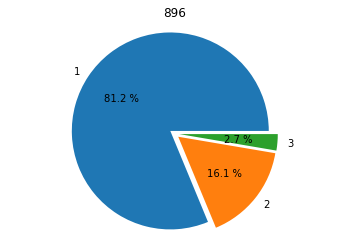

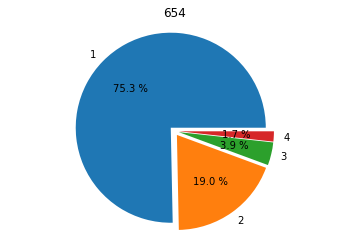

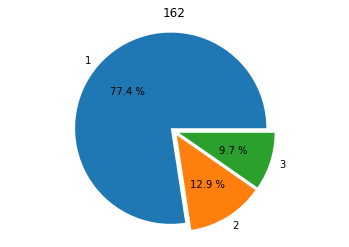

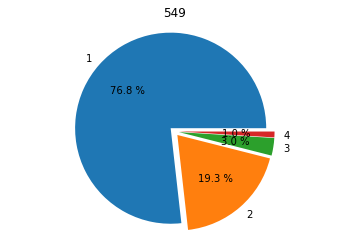

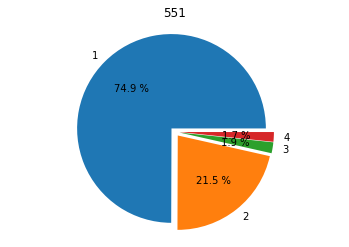

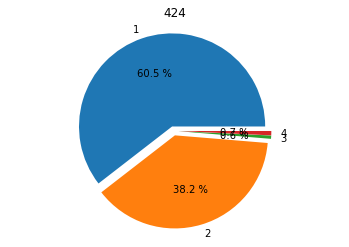

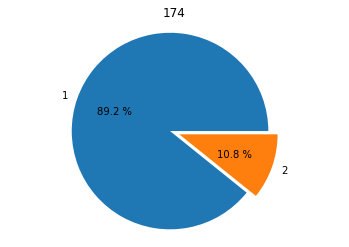

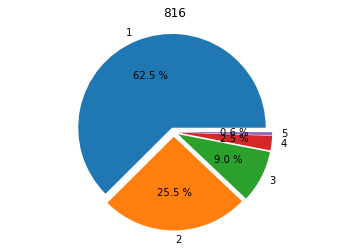

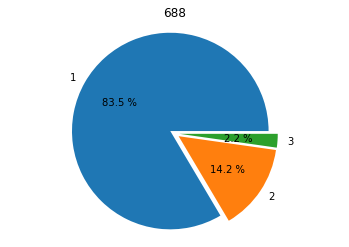

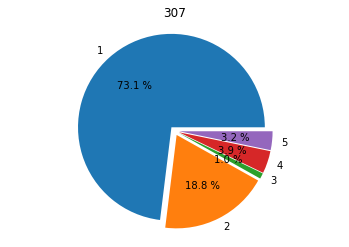

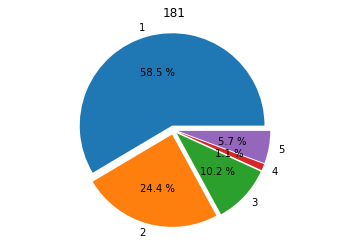

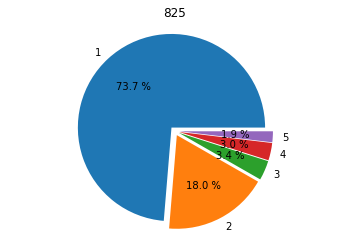

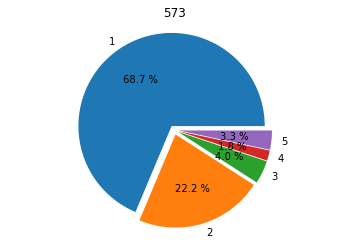

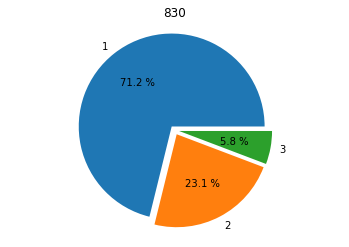

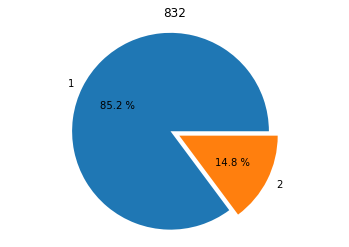

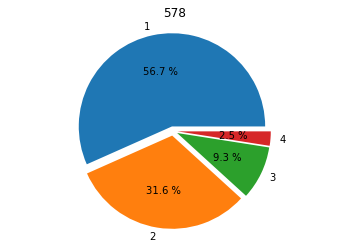

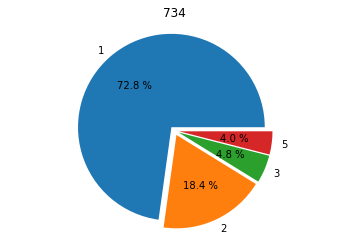

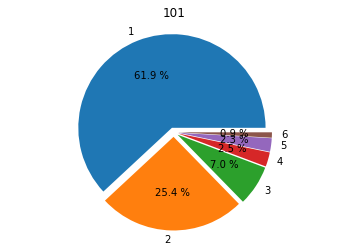

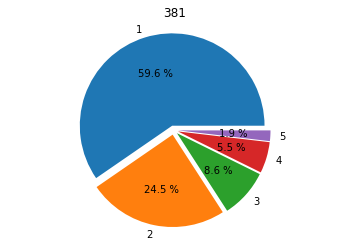

In [8]:
df_resumen  = pd.concat([pd.Series(motorizado_consolida),pd.Series(conteo_gral),pd.Series(ciudad_pedido)],axis=1)
df_resumen.columns = ["Nombre Motorizado","Conteo","Ciudad"]
df_resumen.to_excel(r"C:\Users\luis.montoya\Desktop\MotorizadosResultado.xlsx",index=False)
df_cruce_pedidos = df_inicial.merge(df2_inicial,left_on = "uuid", right_on = "uuid", how = "left")
df_pedidos_unicos = df_cruce_pedidos[df_cruce_pedidos.validacion.isnull()]
df_pedidos_unicos = df_pedidos_unicos[["uuid","resourcename_x","saliopunto_x","nombre_solicitante_x","ciudad_x","Mes_x","Dia_x"]]
df_pedidos_unicos.columns = ["uuid","resourcename","saliopunto","nombre_solicitante","ciudad","Mes","Dia"]
ciudades_principales = list(set(df_resumen["Ciudad"]))
for city in ciudades_principales:
    valores_resumen = []
    categoria_final = []
    porcentajes = []
    categoria_final2 = []
    separacion = []
    df_resumen_ciudad = df_resumen[df_resumen["Ciudad"]==city]
    df_pedidos_unicos_ciudad = df_pedidos_unicos[df_pedidos_unicos["ciudad"]==city]
    Categoria, Cantidad = np.unique(df_resumen_ciudad["Conteo"],return_counts = True)
    for i in range(0,len(Categoria)):
        cantidad_total = Categoria[i]*Cantidad[i]
        valores_resumen.append(cantidad_total)
        categoria_final.append(Categoria[i])
    
    un_pedido = pd.DataFrame([1,len(df_pedidos_unicos_ciudad)])
    resultado_ciudad = pd.concat([pd.Series(categoria_final),pd.Series(valores_resumen)],axis = 1)
    resultado_ciudad = pd.concat([un_pedido.transpose(),resultado_ciudad],axis=0)
    resultado_ciudad.columns = ["Categoria","Cantidad"]
    indice_nuevo = range(0,len(resultado_ciudad))
    resultado_ciudad.index = indice_nuevo
    for i in range(0,len(resultado_ciudad)):
        relacion = (resultado_ciudad.iloc[i,1]/resultado_ciudad["Cantidad"].sum())*100
        porcentajes.append(relacion)
        categoria_final2.append(resultado_ciudad.iloc[i,0])
        separacion.append(0.05)
        
    resultado_porcentual = pd.concat([pd.Series(categoria_final2),pd.Series(porcentajes)],axis=1)
    resultado_porcentual.columns = ["Categoria","%"]
    
    plt.pie(resultado_porcentual["%"], labels=resultado_porcentual["Categoria"],autopct="%0.1f %%",explode = separacion)
    plt.axis("equal")
    plt.title(city)
    plt.show()
    #print(resultado_ciudad)
    #print(resultado_porcentual)
    
    
